# use of Non-Negative Matrix Factorization (NMF) on income dataset
#### finds a decomposition of samples X into two matrices W and H of non-negative elements, by optimizing the distance d between X and the matrix product WH.

In [31]:
import numpy as np
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X = np.array([[1,1,5,2,3], [0,6,2,1,1], [3,4,0,3,1], [4, 1,5,6,3]])
model = NMF(n_components=2)

In [4]:
print(X)

[[1 1 5 2 3]
 [0 6 2 1 1]
 [3 4 0 3 1]
 [4 1 5 6 3]]


In [5]:
W = model.fit_transform(X)
H = model.components_
print(W)

[[1.6282913  0.026322  ]
 [0.39902207 2.18571672]
 [0.75831737 1.53056852]
 [2.59747358 0.01899844]]


In [6]:
print(H)

[[1.35733834 0.41051184 2.16402106 2.04702128 1.33550911]
 [0.25412802 2.58522943 0.         0.3642873  0.14243281]]


In [53]:
#import data
import pandas as pd
train_data = pd.read_csv(r"datasets/income/train-data.csv")
test_data = pd.read_csv(r"datasets/income/test-data.csv")
print('train matrix shape : ',train_data.shape)
train_data.head()

train matrix shape :  (100, 5)


,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,30,34,73,1,0
1,36,103,85,1,0
2,54,101,24,1,0
3,28,101,68,0,1
4,24,39,65,1,0


In [56]:
#Transform data to regroup GENRE in one variable (male =1; female =-1)
newtrain_data = train_data.copy()
newtrain_data["Genre"] = train_data["Genre_Male"] - train_data["Genre_Female"]
newtrain_data = newtrain_data.drop(columns=["Genre_Male","Genre_Female"],axis=1)

newtest_data = test_data.copy()
newtest_data["Genre"] = test_data["Genre_Male"] - test_data["Genre_Female"]
newtest_data = newtest_data.drop(columns=["Genre_Male","Genre_Female"],axis=1)

newtrain_data

,Age,Annual Income (k$),Spending Score (1-100),Genre
0,30,34,73,-1
1,36,103,85,-1
2,54,101,24,-1
3,28,101,68,1
4,24,39,65,-1
...,...,...,...,...
95,19,64,46,1
96,63,48,51,1
97,22,20,79,1
98,31,70,77,-1


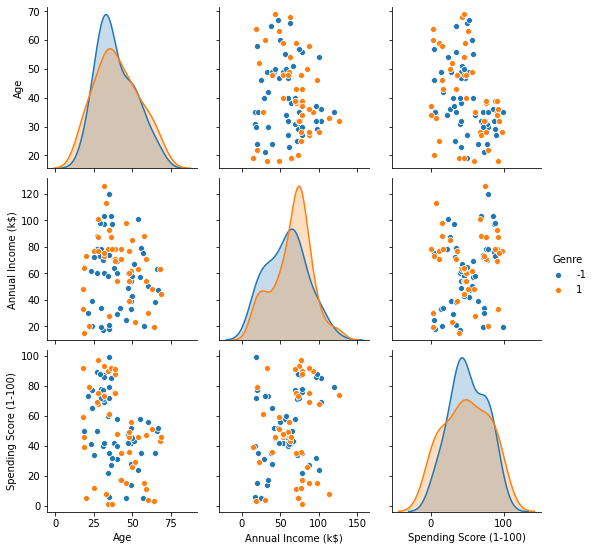

In [57]:
sns.pairplot(data=newtrain_data, hue="Genre")

In [58]:
model1 = NMF(n_components=4)

In [60]:
W = model1.fit_transform(train_data)
H = model1.components_

print(W.shape)
print(W)

(100, 4)
[[1.37660820e+00 3.03889621e+00 1.13039820e+00 3.39514707e-01]
 [4.49671344e+00 2.35981154e+00 2.34332050e-01 0.00000000e+00]
 [2.90848545e+00 0.00000000e+00 2.14419156e+00 4.74008634e+00]
 [3.89453649e+00 1.76690853e+00 1.74935249e-02 1.62711532e+00]
 [1.68520916e+00 2.51875653e+00 6.55263530e-01 5.43841021e-02]
 [3.14338170e+00 3.96302244e-01 2.21283029e-01 0.00000000e+00]
 [2.61947949e+00 1.39861163e+00 5.11449886e-01 0.00000000e+00]
 [4.01511474e+00 2.80259676e+00 3.49502451e-01 1.42925145e-01]
 [4.47920674e+00 1.57801204e+00 3.43047929e-02 5.46401814e-02]
 [1.64569128e+00 1.10496038e+00 2.24483587e+00 1.80881038e-01]
 [3.05152409e+00 2.45542526e+00 9.59127748e-01 1.52878944e-01]
 [3.05169654e+00 2.45535316e+00 1.02143571e+00 1.52327598e-01]
 [2.35752577e+00 1.11079474e+00 2.00901768e+00 0.00000000e+00]
 [3.44896058e+00 3.21094355e-01 2.03094373e+00 0.00000000e+00]
 [3.62530579e+00 1.92589110e+00 6.05035648e-02 6.84889728e-01]
 [3.31796559e+00 2.93852619e+00 4.47509785e-01

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [61]:
print(H)

[[6.71641029e+00 2.29049565e+01 8.25962669e+00 1.18377186e-01
  4.69836325e-02]
 [8.64738515e-01 2.20046826e-04 2.02801615e+01 5.86239466e-02
  9.36018717e-02]
 [1.60310640e+01 0.00000000e+00 0.00000000e+00 1.12885453e-01
  6.75268705e-02]
 [1.94179336e-02 7.25137540e+00 0.00000000e+00 0.00000000e+00
  8.36539982e-02]]
